In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm

In [4]:
df=pd.read_excel(r'D:\downloads\combined+cycle+power+plant\CCPP\Folds5x2_pp.xlsx',sheet_name=0)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
x=df.drop(['PE'],axis=1).values
y=df['PE'].values
print(x,y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]] [463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [9]:
train_percentage = 0.3
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=1-train_percentage, random_state=0)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred= model.predict(X_test)
print(y_pred)

[431.41828755 458.77040635 462.98109075 ... 445.83715748 433.38282731
 445.25644229]


In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 4.576979001748655


In [ ]:
#on average, the model's predictions are closer to the actual values.

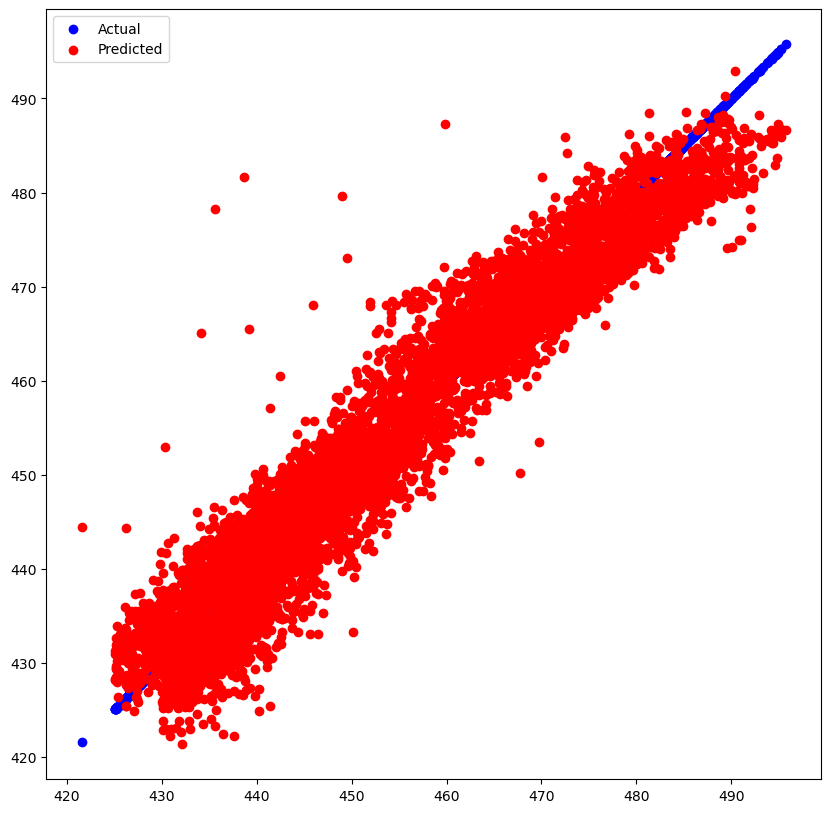

In [19]:
#plt.scatter(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
#plt.figure(figsize=(15,10))
#plt.xlabel('actual')
#plt.ylabel('predicted')
plt.legend()
plt.show()

In [21]:
X = df[['AT','V','AP','RH']]
y = df['PE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:33:27   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [ ]:
 y=b0+b1x1+b2x2+b3x3+b4x4+e

- const(b0+e): 454.6093
- AT (Ambient Temperature): -1.9775
- V (Exhaust Vacuum): -0.2339
- AP (Ambient Pressure): 0.0621
- RH (Relative Humidity): -0.1581

These coefficients represent the estimated values for the intercept b0 and the slopes b1,b2,b3,b4 associated with the respective independent variables (AT, V, AP, RH).

Interpretation:
- const (Intercept): 454.6093 is the estimated value of the dependent variable (PE) when all independent variables are zero.
- AT (Ambient Temperature):For each unit increase in Ambient Temperature, the estimated change in the dependent variable is -1.9775.
- V (Exhaust Vacuum): For each unit increase in Exhaust Vacuum, the estimated change in the dependent variable is -0.2339.
- AP (Ambient Pressure): For each unit increase in Ambient Pressure, the estimated change in the dependent variable is 0.0621.
- RH (Relative Humidity): For each unit increase in Relative Humidity, the estimated change in the dependent variable is -0.1581.
- In this case, all coefficients have p-values less than 0.05, suggesting that they are statistically significant.